## Import libraries

In [69]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)
%reload_ext autoreload
%autoreload 2

## Import the dataset

In [70]:
#data - 7668 intial entries

full_df = pd.read_csv('movies.csv',)
full_df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


## Data cleaning and preparation

In [71]:
full_df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [72]:
#converting to categorical variables
convert = ['rating','genre','director','writer','star','country','company']

for col in full_df[convert]:
    full_df[col] = full_df[col].astype('category')
    
full_df.dtypes

name          object
rating      category
genre       category
year           int64
released      object
score        float64
votes        float64
director    category
writer      category
star        category
country     category
budget       float64
gross        float64
company     category
runtime      float64
dtype: object

In [73]:
#how much data is missing per column (null values)
for col in full_df.columns:
    percent_missing = 100*np.mean(full_df[col].isnull())
    print('{}-{}%'.format(col, percent_missing))

name-0.0%
rating-1.004173187271779%
genre-0.0%
year-0.0%
released-0.02608242044861763%
score-0.03912363067292645%
votes-0.03912363067292645%
director-0.0%
writer-0.03912363067292645%
star-0.013041210224308816%
country-0.03912363067292645%
budget-28.31246739697444%
gross-2.464788732394366%
company-0.2217005738132499%
runtime-0.05216484089723526%


In [94]:
#delete duplicates and an entries with NaN 
df = full_df.drop_duplicates(subset=['name'])
df = df.dropna()
df.reset_index(drop=True, inplace=True)
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5285,Bad Boys for Life,R,Action,2020,"January 17, 2020 (United States)",6.6,140000.0,Adil El Arbi,Peter Craig,Will Smith,United States,90000000.0,426505244.0,Columbia Pictures,124.0
5286,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020 (United States)",6.5,102000.0,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000.0,319715683.0,Paramount Pictures,99.0
5287,Dolittle,PG,Adventure,2020,"January 17, 2020 (United States)",5.6,53000.0,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000.0,245487753.0,Universal Pictures,101.0
5288,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000.0,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000.0,111105497.0,20th Century Studios,100.0


## Summary statistics

In [75]:
#summary of categorical features
df.describe(include='object')

,name,released
count,5290,5290
unique,5290,2537
top,The Shining,"January 25, 2002 (United States)"
freq,1,7


In [76]:
#numerical features
df.describe(include=['int64','float64'])

,year,score,votes,budget,gross,runtime
count,5290.000000,5290.000000,5.290000e+03,5.290000e+03,5.290000e+03,5290.000000
mean,2001.465217,6.396276,1.142152e+05,3.563494e+07,1.013218e+08,108.041588
std,10.536884,0.962397,1.838673e+05,4.131861e+07,1.835464e+08,18.009477
min,1980.000000,1.900000,1.950000e+02,6.000000e+03,3.090000e+02,63.000000
25%,1993.000000,5.800000,1.900000e+04,1.000000e+07,1.058203e+07,95.000000
50%,2002.000000,6.500000,5.200000e+04,2.100000e+07,3.569860e+07,105.000000
75%,2010.000000,7.100000,1.280000e+05,4.500000e+07,1.102924e+08,118.000000
max,2020.000000,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,271.000000


array([[<Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'score'}>],
       [<Axes: title={'center': 'votes'}>,
        <Axes: title={'center': 'budget'}>],
       [<Axes: title={'center': 'gross'}>,
        <Axes: title={'center': 'runtime'}>]], dtype=object)

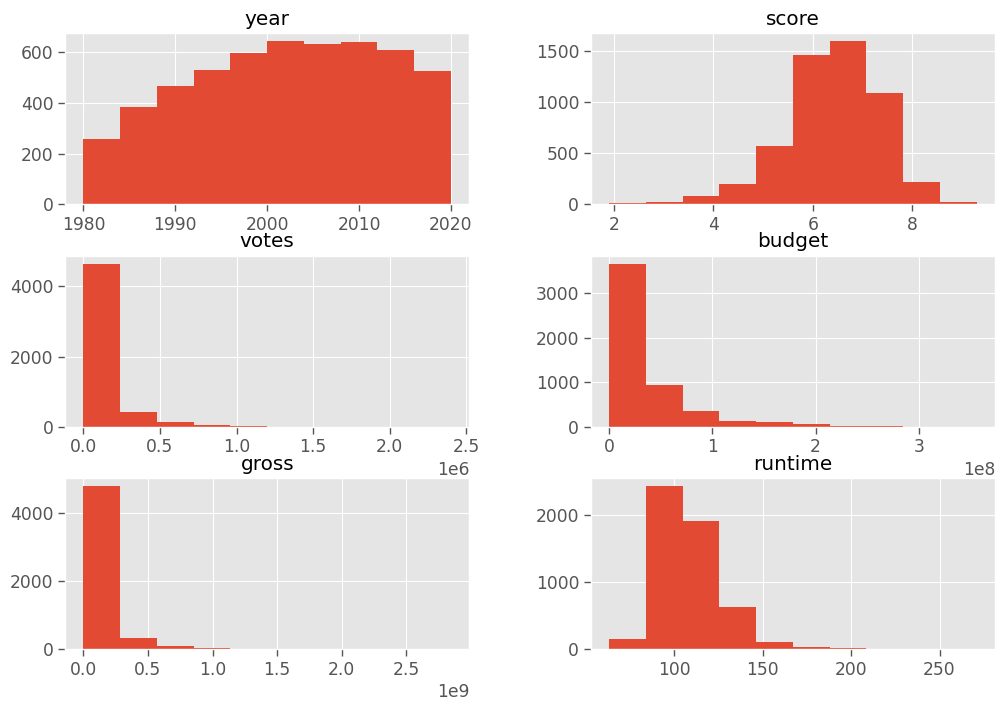

In [77]:
#distribution of numerical features
df.hist()

budget, votes, gross, runtime are skewed right

year has a very broad, slightly left skewed distribution

Text(0.5, 1.0, 'Budget Distribution in the Billions')

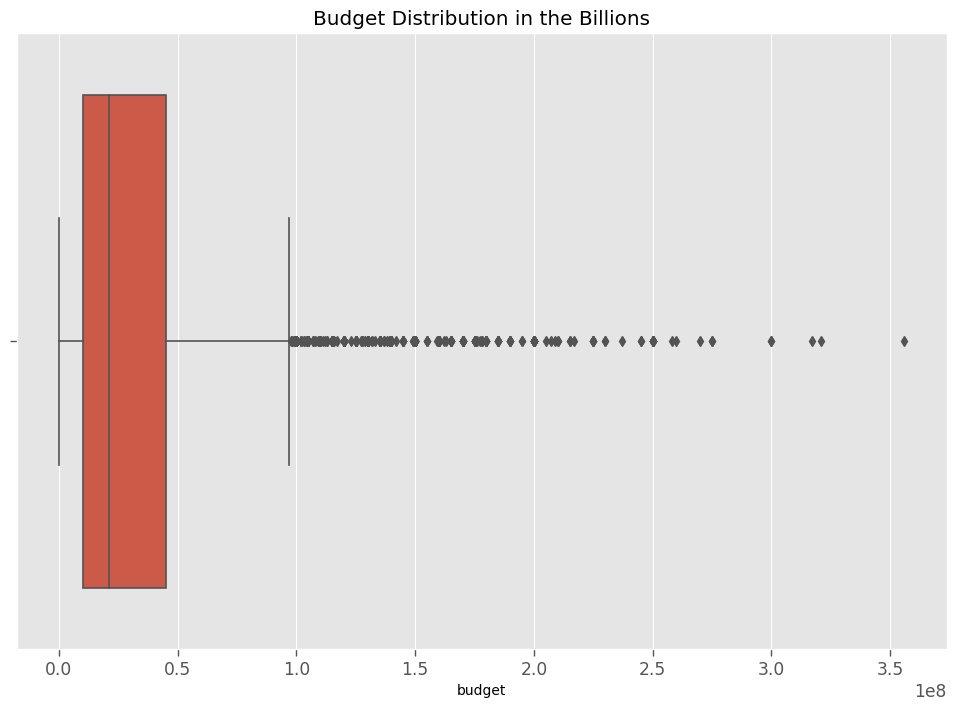

In [78]:
sns.boxplot(x=df['budget'])
plt.title('Budget Distribution in the Billions')

positively skewed

Text(0.5, 1.0, 'Gross Distribution in the Billions')

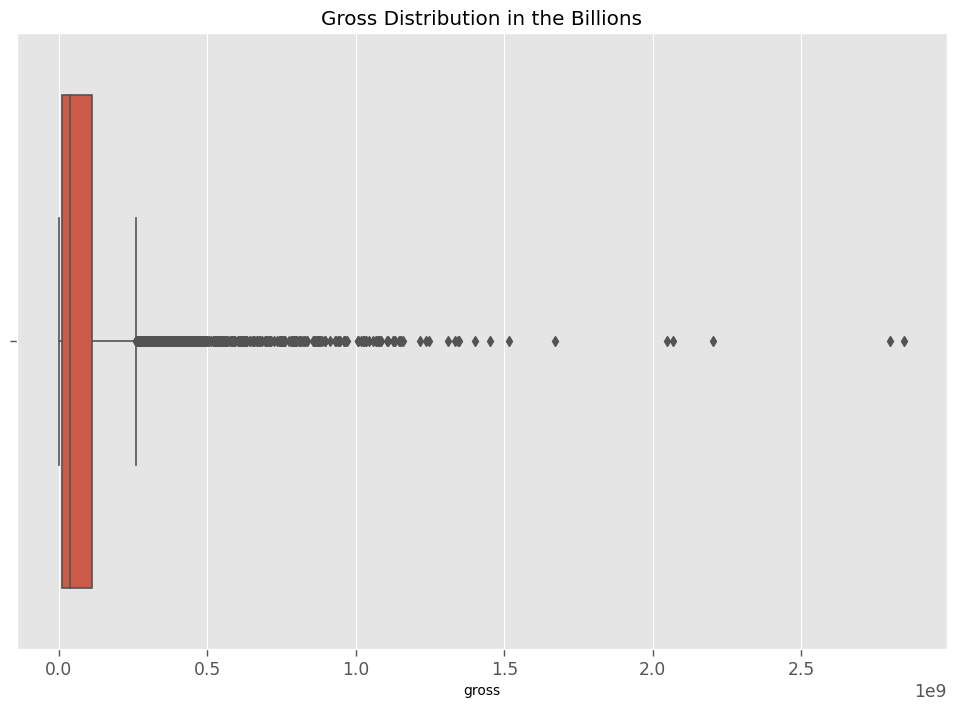

In [79]:
sns.boxplot(x=df['gross'])
plt.title('Gross Distribution in the Billions')

positively skewed

## What companies bring in the most revenue?

In [80]:
#top 15 companies by gross

company_gross = df.groupby('company')[['gross']].sum()
company_gross_sorted = company_gross.sort_values('gross', ascending=False)[:20]

company_gross_sorted

,gross
company,
Warner Bros.,5.324814e+10
Universal Pictures,5.025678e+10
Columbia Pictures,4.087009e+10
Paramount Pictures,3.882613e+10
Twentieth Century Fox,3.844517e+10
Walt Disney Pictures,3.285952e+10
New Line Cinema,1.874959e+10
Marvel Studios,1.354678e+10
DreamWorks Animation,1.187361e+10


## Which companies have released the most films?

In [81]:
#top 20 companies by number of films released
df['company'].value_counts()[:20]

Universal Pictures           326
Columbia Pictures            295
Warner Bros.                 293
Paramount Pictures           273
Twentieth Century Fox        205
New Line Cinema              149
Walt Disney Pictures         104
Touchstone Pictures          102
Metro-Goldwyn-Mayer (MGM)     94
TriStar Pictures              75
Dreamworks Pictures           72
Miramax                       63
Fox 2000 Pictures             55
Summit Entertainment          52
Screen Gems                   51
Lionsgate                     50
Fox Searchlight Pictures      48
Dimension Films               47
Orion Pictures                46
Castle Rock Entertainment     44
Name: company, dtype: int64

## How have movie budgets and gross changed over the years?

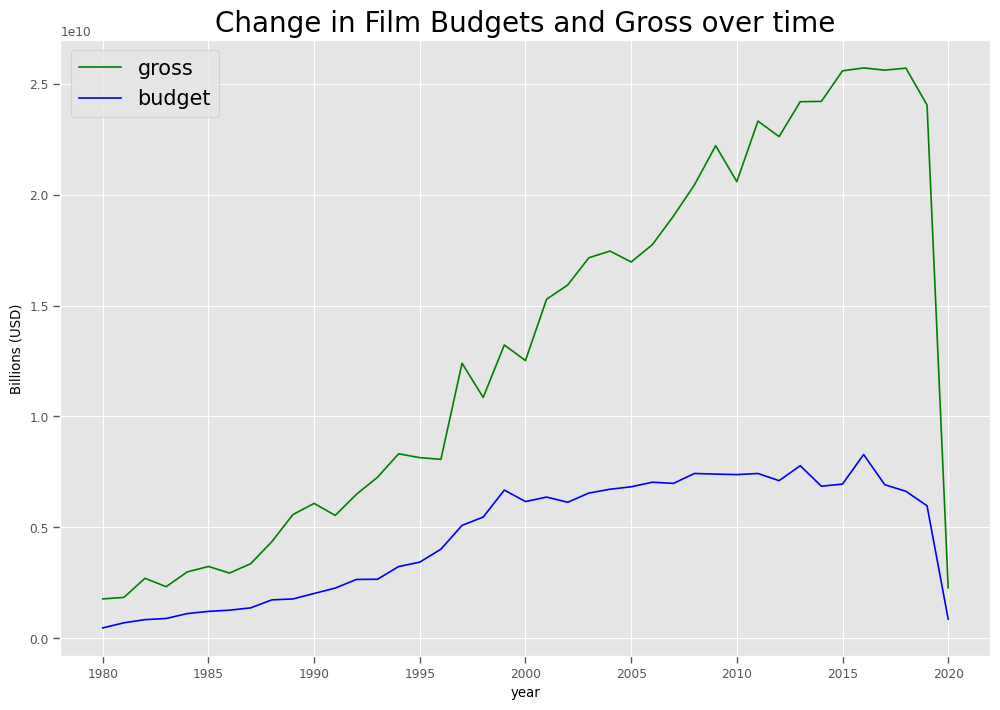

In [82]:
#summing gross by year
gross_over_yrs = df.groupby('year')[['gross']].sum()
gross_yr_sorted = gross_over_yrs.sort_values('year', ascending=False)

#summing budget by year
budget_over_yrs = df.groupby('year')[['budget']].sum()
budget_yr_sorted = budget_over_yrs.sort_values('year', ascending=False)


sns.set_context(context='paper')
g = sns.lineplot(gross_yr_sorted, palette=['g'])
b = sns.lineplot(budget_yr_sorted, palette=['b'])

#title and legend
plt.title('Change in Film Budgets and Gross over time')
g.legend(fontsize=15)
b.legend(fontsize=15)
plt.ylabel('Billions (USD)')
g.title.set_size(20)

## Distribution of movie genres

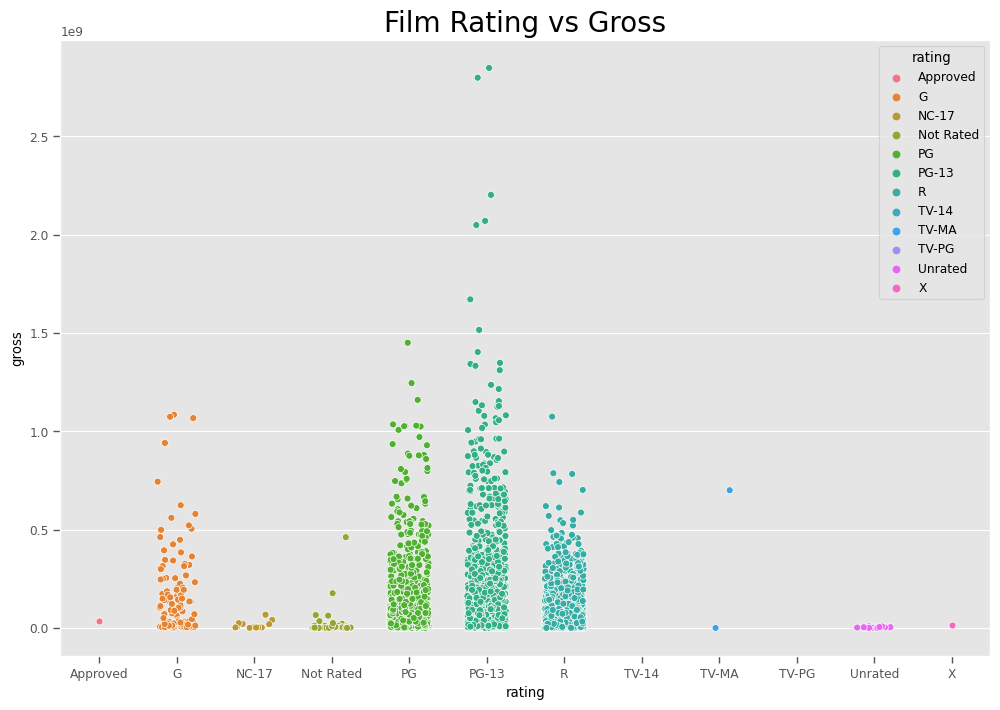

In [83]:
sns.set_context(context='paper')
axes = sns.stripplot(x='rating', y='gross', data=df, hue='rating', 
                     jitter=0.25, linewidth=0.5, edgecolor='white')
plt.title('Film Rating vs Gross')
axes.title.set_size(20)

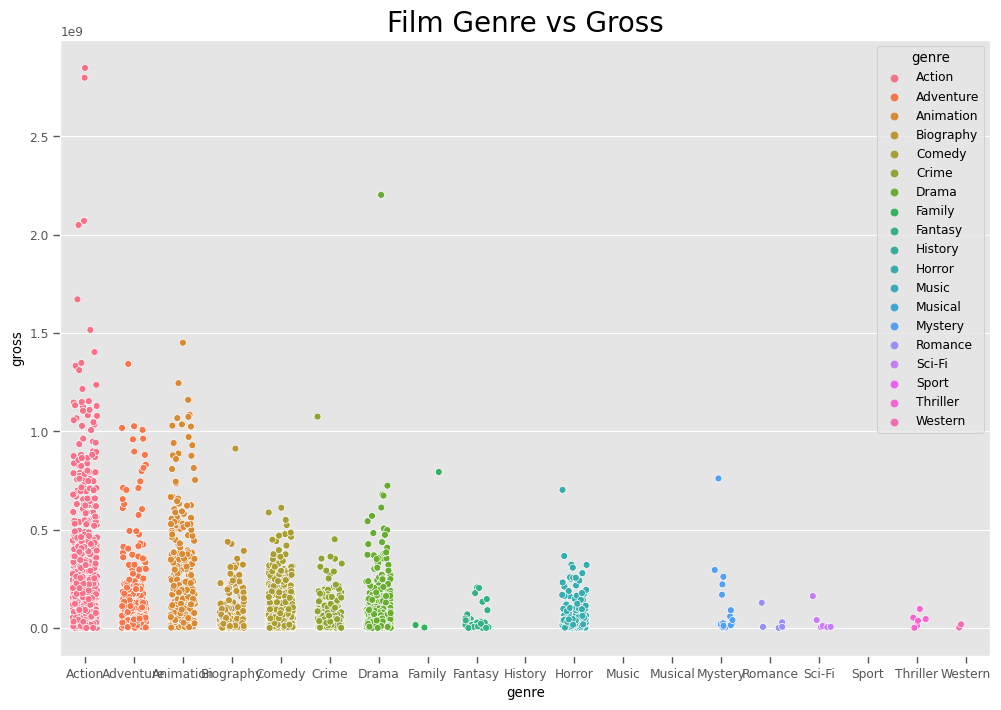

In [84]:
sns.set_context(context='paper')
axes = sns.stripplot(x='genre', y='gross', data=df, hue='genre', 
                     jitter=0.25, linewidth=0.5, edgecolor='white')
plt.title('Film Genre vs Gross')
axes.title.set_size(20)

## What relationships exist in the data - correlations

<Axes: >

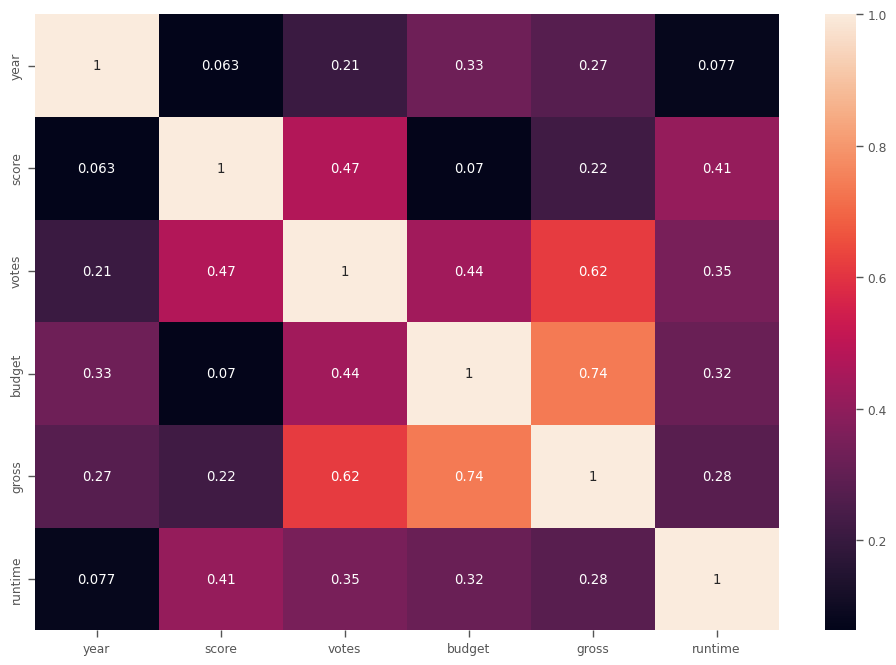

In [85]:
#heatmap of all correlations between numerical features - what are some notable relationships within the dataset?
corr_mat = df.corr(numeric_only=True)
sns.heatmap(corr_mat, annot=True)

The matrix shows mostly no relation-to weak relationships.

__weak: 0.1-0.3  moderate: 0.4-0.6  strong: 0.7-0.9__

In [86]:
#unstacking the correlation matrix to find the strongest relationships
corr_pairs = corr_mat.unstack()
sorted_pairs = corr_pairs.sort_values(kind='quicksort')

In [87]:
#sorting the relationships
pairs = sorted_pairs[abs(sorted_pairs) < 1.00]
strong_pairs = pairs[abs(pairs) > 0.7]

moderate_pairs = pairs[abs(pairs) > 0.4]
moderate_pairs = moderate_pairs[abs(moderate_pairs) < 0.6]

weak_pairs = pairs[abs(pairs) > 0.1]
weak_pairs = weak_pairs[abs(weak_pairs) < 0.3]

print(f'''Strong relationships:\n{strong_pairs} 
        Moderate relationships: \n{moderate_pairs} 
        Weak relationships: \n{weak_pairs}''')

Strong relationships:
budget  gross     0.738784
gross   budget    0.738784
dtype: float64 
        Moderate relationships: 
runtime  score      0.412055
score    runtime    0.412055
votes    budget     0.436980
budget   votes      0.436980
votes    score      0.473199
score    votes      0.473199
dtype: float64 
        Weak relationships: 
year     votes      0.208740
votes    year       0.208740
gross    score      0.221729
score    gross      0.221729
year     gross      0.272980
gross    year       0.272980
         runtime    0.278366
runtime  gross      0.278366
dtype: float64


## Predicting movie gross using simple linear regression

R^2: 0.5458013805252635


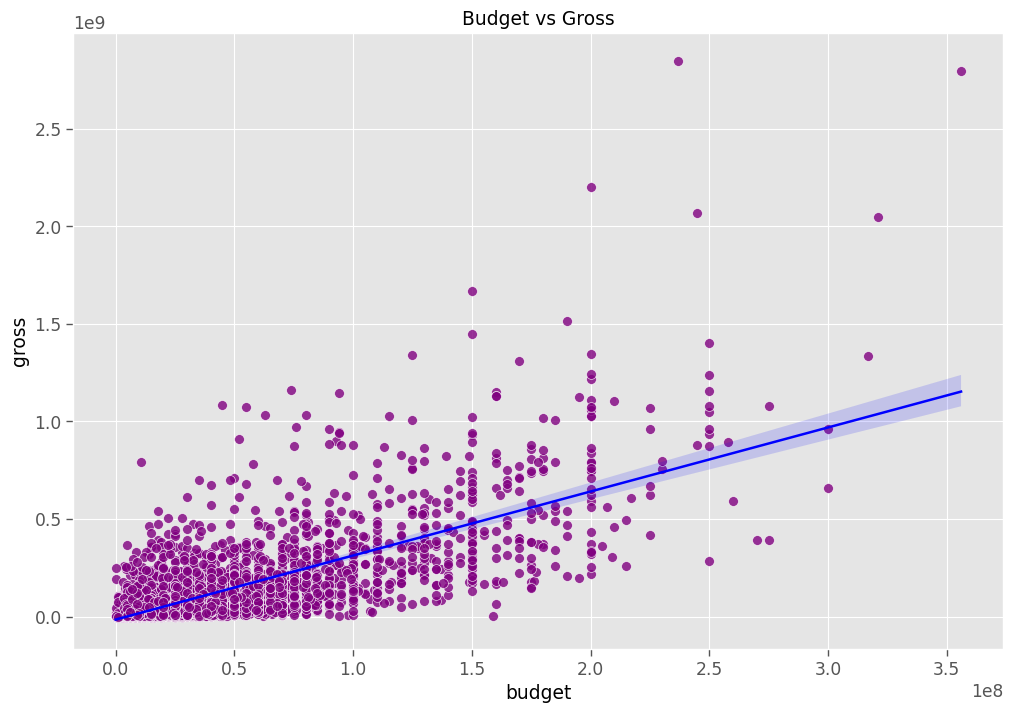

In [88]:
#budget vs gross
sns.set_context('paper', font_scale=1.4)
sns.regplot(x='budget', y='gross', data=df, ci=95, x_jitter=0.05, 
           scatter_kws={'s': 50, 'linewidth': 0.5, 'edgecolor': 'w', 'color': 'purple'},
          line_kws={'color': 'blue'})
corr = df['budget'].corr(df['gross'])
plt.title('Budget vs Gross')
print(f'R^2: {corr**2}')

the R^2 of about 55% means budget alone does not do a great job of predicting gross at the 95% confidence level when at the higher end of gross and budget.

R^2: 0.5458013805252635


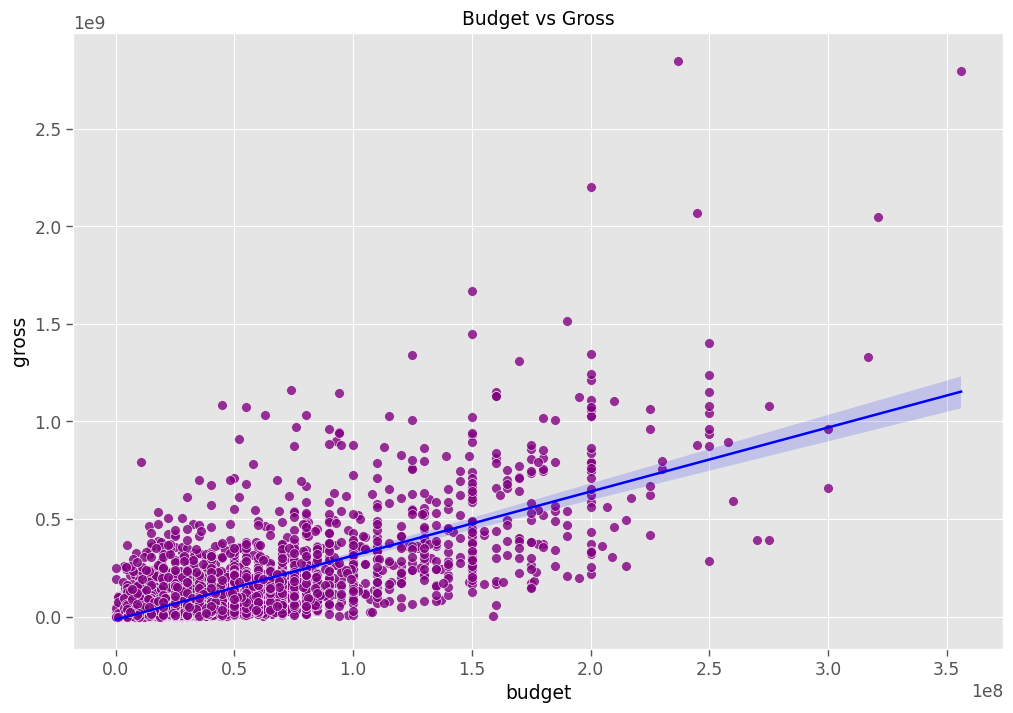

In [89]:
#budget vs gross
sns.set_context('paper', font_scale=1.4)
sns.regplot(x='budget', y='gross', data=df, ci=95, x_jitter=0.05, 
           scatter_kws={'s': 50, 'linewidth': 0.5, 'edgecolor': 'w', 'color': 'purple'},
          line_kws={'color': 'blue'})
corr = df['budget'].corr(df['gross'])
plt.title('Budget vs Gross')
print(f'R^2: {corr**2}')

R^2: 0.2239170934187832


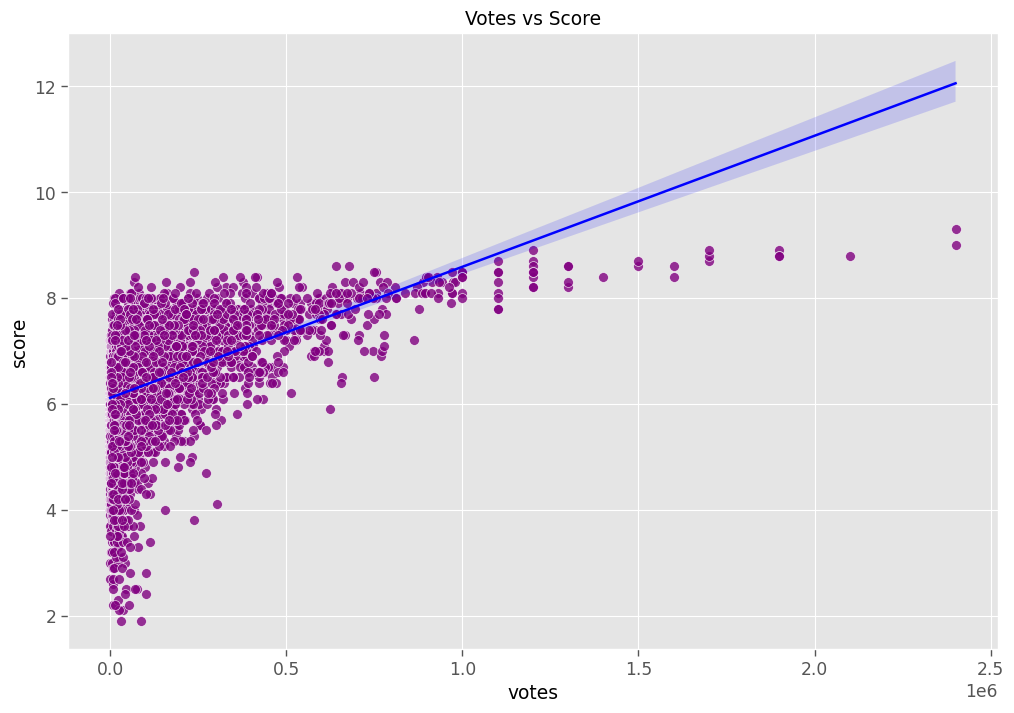

In [90]:
#votes vs gross
sns.set_context('paper', font_scale=1.4)
sns.regplot(x='votes', y='score', data=df, ci=95, x_jitter=0.05, 
           scatter_kws={'s': 50, 'linewidth': 0.5, 'edgecolor': 'w', 'color': 'purple'},
          line_kws={'color': 'blue'})
corr = df['votes'].corr(df['score'])
plt.title('Votes vs Score')
print(f'R^2: {corr**2}')

despite the relatively strong correlation between budget and score, the budget does not do a great job of explaining the score of a movie.

## Predicting movie gross using multivariate linear regression

In [95]:
#turn important categorical variables into continuous variables for regression
reg_df = df.copy()
        
for col in reg_df[convert]:
    reg_df[col] = reg_df[col].cat.codes
    
reg_df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,6,6,1980,"June 13, 1980 (United States)",8.4,927000.0,2589,4014,1047,54,19000000.0,46998772.0,2319,146.0
1,The Blue Lagoon,6,1,1980,"July 2, 1980 (United States)",5.8,65000.0,2269,1632,327,55,4500000.0,58853106.0,731,104.0
2,Star Wars: Episode V - The Empire Strikes Back,4,0,1980,"June 20, 1980 (United States)",8.7,1200000.0,1111,2567,1745,55,18000000.0,538375067.0,1540,124.0
3,Airplane!,4,4,1980,"July 2, 1980 (United States)",7.7,221000.0,1301,2000,2246,55,3500000.0,83453539.0,1812,88.0
4,Caddyshack,6,4,1980,"July 25, 1980 (United States)",7.3,108000.0,1054,521,410,55,6000000.0,39846344.0,1777,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5285,Bad Boys for Life,6,0,2020,"January 17, 2020 (United States)",6.6,140000.0,24,3365,2761,55,90000000.0,426505244.0,731,124.0
5286,Sonic the Hedgehog,4,0,2020,"February 14, 2020 (United States)",6.5,102000.0,1251,3253,229,55,85000000.0,319715683.0,1812,99.0
5287,Dolittle,4,1,2020,"January 17, 2020 (United States)",5.6,53000.0,2606,4007,2241,55,175000000.0,245487753.0,2281,101.0
5288,The Call of the Wild,4,1,2020,"February 21, 2020 (United States)",6.8,42000.0,451,2954,959,6,135000000.0,111105497.0,18,100.0


In [92]:
from sklearn.model_selection import train_test_split, KFold
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

### KFold cross validation and scoring the regression model

===== Fold: 1 ======
r2: 0.664168940243407


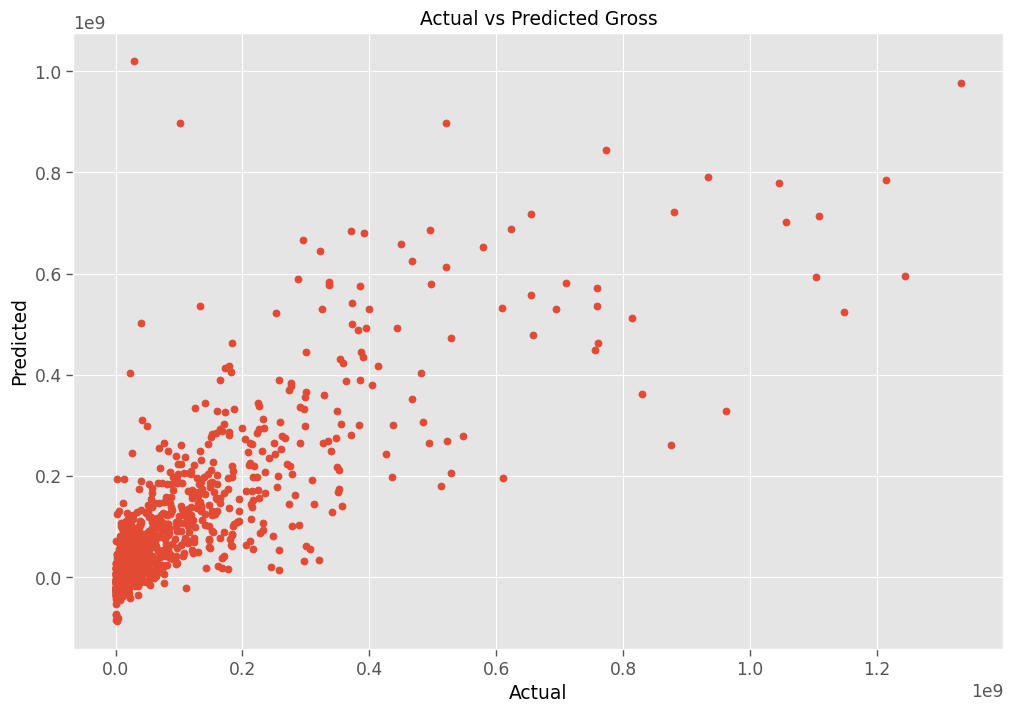

===== Fold: 2 ======
r2: 0.6619094817306285


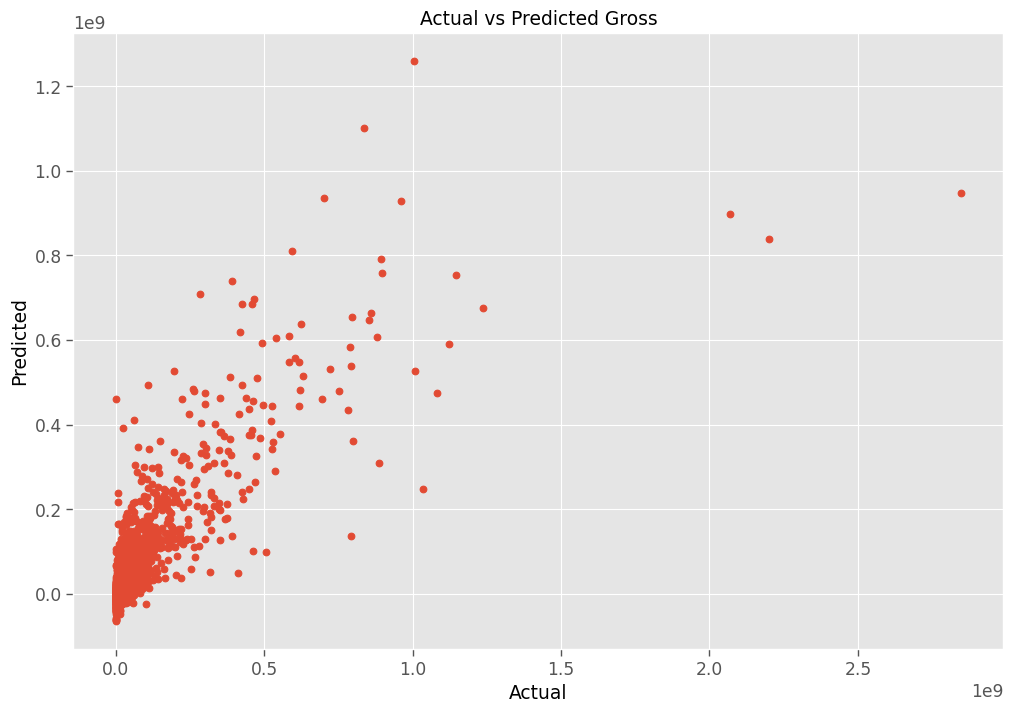

===== Fold: 3 ======
r2: 0.6570073715762469


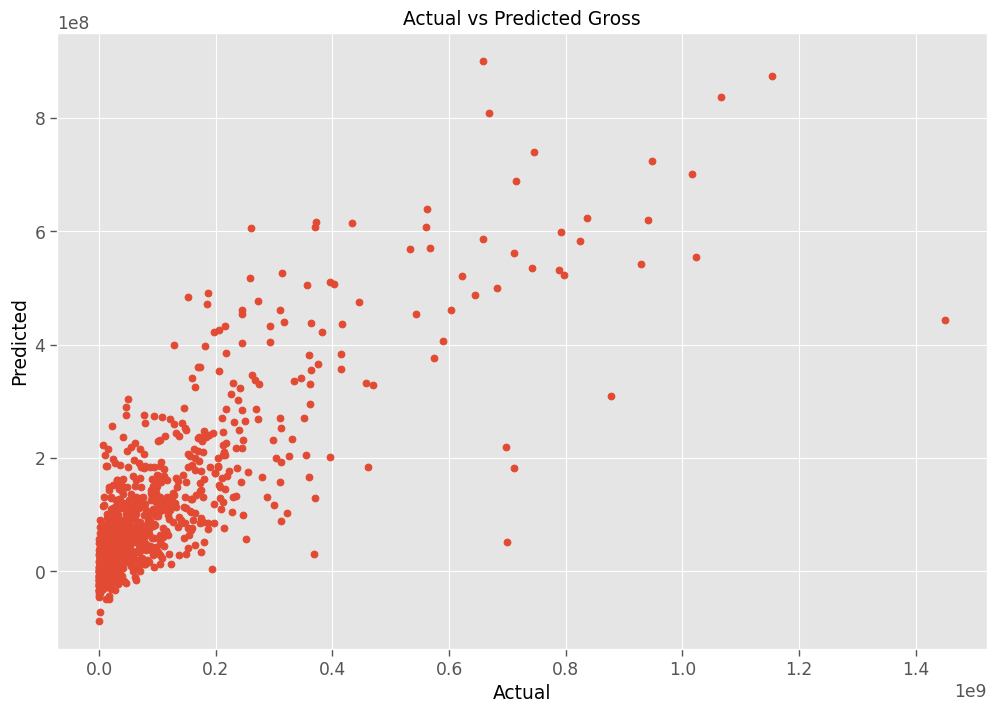

===== Fold: 4 ======
r2: 0.6720667323048837


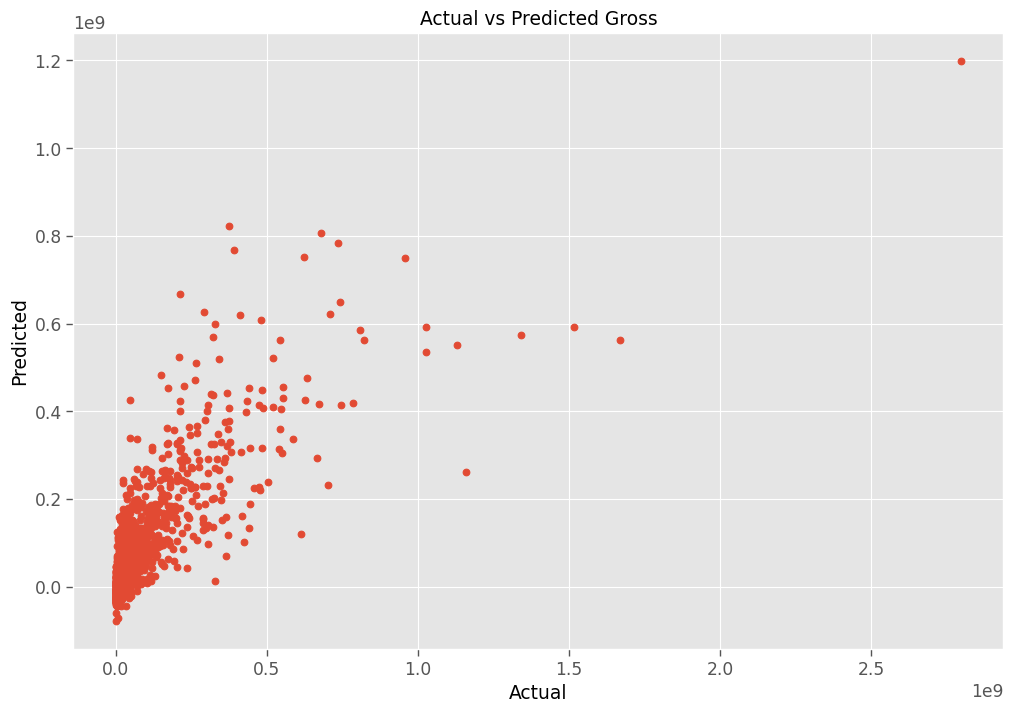

===== Fold: 5 ======
r2: 0.645642154498985


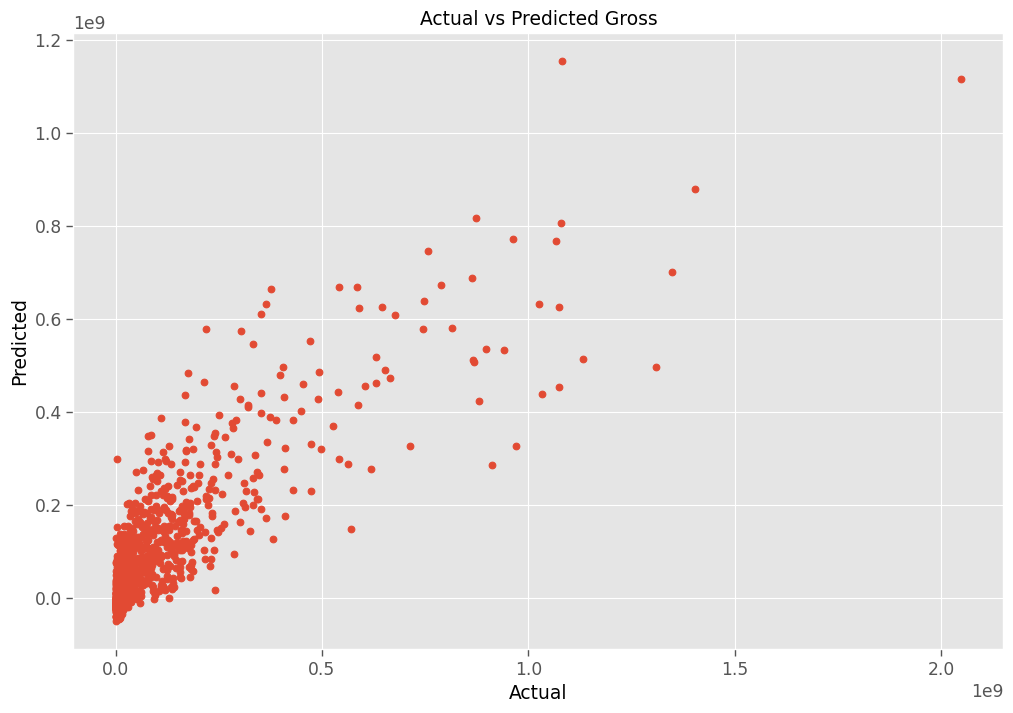

In [98]:
FEATURES = ['budget','votes','score','rating','genre','director','writer','star','country','company','runtime', 'year']
TARGET = ['gross']

X = reg_df[FEATURES]
y = reg_df[TARGET]

kf = KFold(n_splits=5, shuffle=True, random_state=1)
reg = linear_model.LinearRegression()

fold = 0
for train_idx, test_idx in kf.split(X,y):
    X_train = X.loc[train_idx]
    y_train = y.loc[train_idx]
    X_test = X.loc[test_idx]
    y_test = y.loc[test_idx]
    
    reg.fit(X_train, y_train)
    
    pred_y_train = reg.predict(X_train)
    pred_y_test = reg.predict(X_test)
    r2 = r2_score(y_train, pred_y_train)
    
    fold+=1
    print(f'===== Fold: {fold} ======')
    print(f'r2: {r2}')
    
    plt.scatter(y_test,pred_y_test)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title('Actual vs Predicted Gross')
    plt.show()